In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Interpolacion unidimensional
from scipy.interpolate import interp1d

## Interpolacion!

In [13]:
#datos 
x = np.array([0,4,2,5,6])
y = np.array([0,0.7,0.2, -1, -0.9])

intlineal = interp1d(x,y)
intcub = interp1d(x,y,kind='cubic')

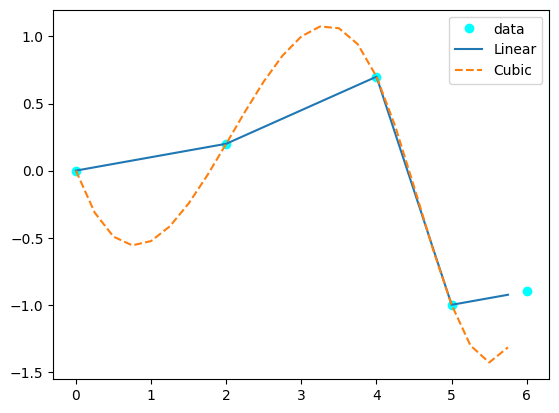

In [15]:
space = np.arange(0,6,0.25)

fig , ax = plt.subplots()

ax.plot(x,y, 'o', color='cyan',label='data')
ax.plot(space, intlineal(space), '-', label= 'Linear')
ax.plot(space, intcub(space), '--', label='Cubic')
ax.legend(loc='best')

plt.show()

## Aproximacion

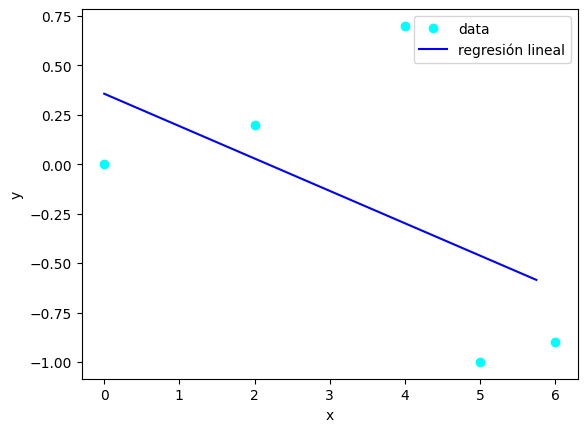

In [18]:
from scipy.stats import linregress

m, n, r_value, p_value, std_err = linregress(x, y)

# Graficamos:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='cyan', label='data')
ax.plot(space, m*space + n, '-', color='blue', label='regresión lineal')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

## Ajuste de curvas

In [26]:
from scipy.optimize import curve_fit

In [30]:
#la funcion que siguen nuestros datos es :
def expfunc(x,a,b,c):
    return a*np.exp(-b*x)+c

xdataleatorios = np.linspace(0,4,30)
y = expfunc(xdataleatorios, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdataleatorios.size)
ydata = y + y_noise

In [31]:
popt, pcov = curve_fit(expfunc, xdataleatorios, ydata)
#popt: parametros optimizados
#pcov: parametros de covarianza

print('parametros optimizados: ', popt)
print('Matriz de covarianza: \n', pcov)

parametros optimizados:  [2.37373575 1.4472079  0.61376505]
Matriz de covarianza: 
 [[ 0.01962595  0.00889253 -0.00122511]
 [ 0.00889253  0.03268742  0.00711823]
 [-0.00122511  0.00711823  0.00329253]]


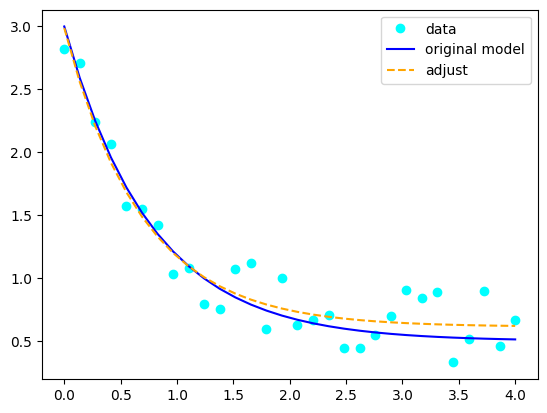

In [32]:
fig, ax = plt.subplots()

ax.plot(xdataleatorios, ydata, 'o', color='cyan', label='data')
ax.plot(xdataleatorios, expfunc(xdataleatorios, 2.5,1.3,0.5), '-', color='blue', label='original model')
ax.plot(xdataleatorios, expfunc(xdataleatorios, *popt), '--', color='orange', label='adjust')
ax.legend(loc='best')